In [1]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path

epochs = 20

In [2]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate=1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [3]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

In [4]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [5]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


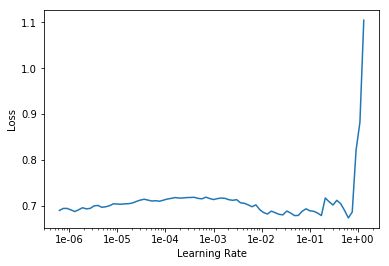

In [6]:
learn.recorder.plot()

In [7]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.661723    0.641112    0.575290  (00:09)
2      0.654633    0.545032    0.741313  (00:08)
3      0.670416    0.570859    0.733591  (00:07)
4      0.651555    0.529676    0.799228  (00:07)



In [8]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:14
epoch  train_loss  valid_loss  accuracy
1      0.617509    0.512781    0.803089  (00:20)
2      0.580838    0.559280    0.733591  (00:23)
3      0.589785    0.468276    0.849421  (00:21)
4      0.585780    0.470062    0.830116  (00:20)
5      0.593007    0.419783    0.864865  (00:19)
6      0.589903    0.457528    0.857143  (00:18)
7      0.541362    0.443408    0.868726  (00:21)
8      0.487471    0.370770    0.884170  (00:24)
9      0.468313    0.383583    0.884170  (00:23)
10     0.454902    0.353890    0.903475  (00:23)
11     0.487468    0.346125    0.903475  (00:19)
12     0.509144    0.344614    0.899614  (00:18)
13     0.451079    0.303001    0.918919  (00:23)
14     0.463471    0.287013    0.918919  (00:19)
15     0.446219    0.279524    0.922780  (00:20)
16     0.385080    0.275591    0.930502  (00:24)
17     0.362281    0.229361    0.938224  (00:25)
18     0.415110    0.221834    0.938224  (00:20)
19     0.386466    0.215191    0.934363  (00:22)
20     0.36

In [9]:
learn.validate()

[0.21505192, tensor(0.9382)]

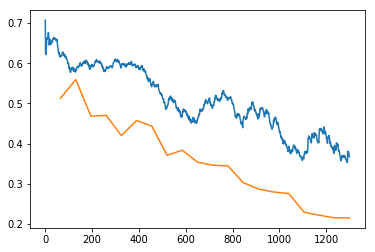

In [10]:
learn.recorder.plot_losses()

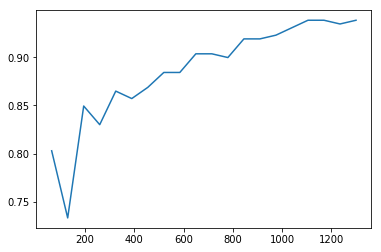

In [11]:
learn.recorder.plot_metrics()

In [12]:
import torch

torch.cuda.empty_cache()